In [14]:
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import pickle

def load(file_path):
    with open(file_path, "rb") as input_handle:
        value = pickle.load(input_handle)
    return value

def save(value, file_path):
    with open(file_path, "wb") as output_handle:
        pickle.dump(value, output_handle, protocol = pickle.HIGHEST_PROTOCOL)

In [2]:
analysis_directory = "analysis"

def create_directory_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def create_file_path(directory, file_name):
    file_path = os.path.join(directory, file_name)
    return file_path

def parse_train_line(line):
    epoch = None
    loss = None
    match = re.search("\[epoch =(.+?)\] train_loss =(.+?)\n", line)
    if (match and len(match.groups()) == 2):
        epoch = int(match.groups()[0].strip())
        loss = float(match.groups()[1].strip())
    return (epoch, loss)

def parse_validation_line(line):
    epoch = None
    loss = None
    match = re.search("\[epoch =(.+?)\] validation_loss =(.+?)\n", line)
    if (match and len(match.groups()) == 2):
        epoch = int(match.groups()[0].strip())
        loss = float(match.groups()[1].strip())
    return (epoch, loss)

def parse_test_line(line):
    loss = None
    match = re.search("test_loss =(.+?)\n", line)
    if (match and len(match.groups()) == 1):
        loss = float(match.groups()[0].strip())
    return loss

def parse_total_training_time_line(line):
    time = None
    match = re.search("Total training time:(.+?)\n", line)
    if (match and len(match.groups()) == 1):
        time = match.groups()[0].strip()
    return time

def read_and_parse_train_data(file_path):
    train_lines = [parse_train_line(line) for line in open(file_path) if "] train_loss =" in line]
    epochs = [entry[0] for entry in train_lines]
    losses = [entry[1] for entry in train_lines]
    return (epochs, losses)

def read_and_parse_validation_data(file_path):
    validation_lines = [parse_validation_line(line) for line in open(file_path) if "] validation_loss =" in line]
    epochs = [entry[0] for entry in validation_lines]
    losses = [entry[1] for entry in validation_lines]
    return (epochs, losses)

def read_and_parse_test_data(file_path):
    test_lines = [parse_test_line(line) for line in open(file_path) if "test_loss =" in line]
    return test_lines[0]

def read_and_parse_total_training_time(file_path):
    total_training_time = [parse_total_training_time_line(line) for line in open(file_path) if "Total training time:" in line]
    return total_training_time[0]
    
create_directory_if_not_exists(analysis_directory)

details = {}

In [3]:
homer_simpson_file_name = "homer_simpson_char_lstm_e10k_l4_es1k.txt"
sherlock_holmes_file_name = "sherlock_holmes_char_lstm_e10k_l4_es1k.txt"

In [9]:
details["generic"] = { "model": { "size": "2.4 MB", "test_loss": 272.35, "training_loss_plot": "generic_loss.png" } }
details["homer"] = { "model": { "size": "3 MB" } }
details["sherlock"] = { "model": { "size": "3 MB" } }
details["generic"]["data"] = {
    "size": "25 MB",
    "line_count": 511741
}
details["homer"]["data"] = {
    "size": "35.2 MB",
    "line_count": 38156
}
details["sherlock"]["data"] = {
    "size": "250 KB",
    "line_count": 7677
}

In [10]:
homer_simpson_total_training_time = read_and_parse_total_training_time(homer_simpson_file_name)
sherlock_holmes_total_training_time = read_and_parse_total_training_time(sherlock_holmes_file_name)
details["homer"]["model"]["training_time"] = homer_simpson_total_training_time
details["sherlock"]["model"]["training_time"] = sherlock_holmes_total_training_time

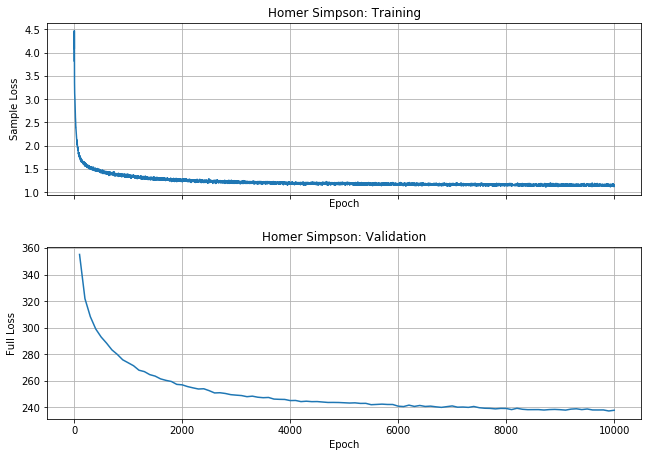

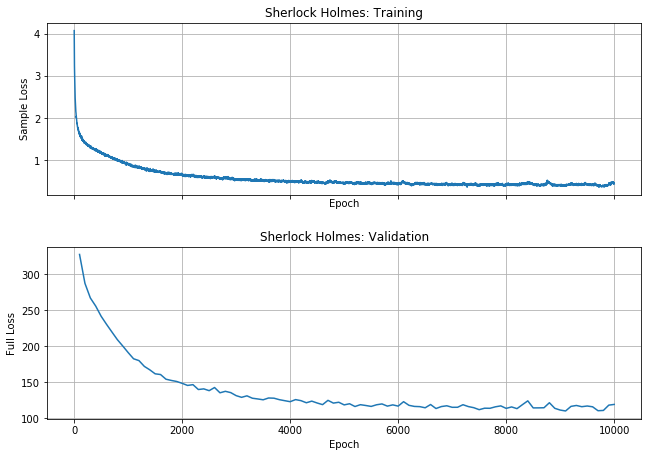

In [11]:
plt.figure(1)
plt.clf()
f, (training, validation) = plt.subplots(2, sharex = True)
homer_training = read_and_parse_train_data(homer_simpson_file_name)
training.plot(homer_training[0], homer_training[1])
training.set_title("Homer Simpson: Training")
training.set(xlabel = "Epoch", ylabel = "Sample Loss")
training.grid(True)
homer_validation = read_and_parse_validation_data(homer_simpson_file_name)
validation.plot(homer_validation[0], homer_validation[1])
validation.set_title("Homer Simpson: Validation")
validation.set(xlabel = "Epoch", ylabel = "Full Loss")
validation.grid(True)
plt.subplots_adjust(top = 1.5, right = 1.5, wspace = 0.3, hspace = 0.3)
image_file_path = create_file_path(analysis_directory, "homer_loss.png")
plt.savefig(image_file_path, bbox_inches = "tight")

plt.figure(1)
plt.clf()
f, (training, validation) = plt.subplots(2, sharex = True)
sherlock_training = read_and_parse_train_data(sherlock_holmes_file_name)
training.plot(sherlock_training[0], sherlock_training[1])
training.set_title("Sherlock Holmes: Training")
training.set(xlabel = "Epoch", ylabel = "Sample Loss")
training.grid(True)
sherlock_validation = read_and_parse_validation_data(sherlock_holmes_file_name)
validation.plot(sherlock_validation[0], sherlock_validation[1])
validation.set_title("Sherlock Holmes: Validation")
validation.set(xlabel = "Epoch", ylabel = "Full Loss")
validation.grid(True)
plt.subplots_adjust(top = 1.5, right = 1.5, wspace = 0.3, hspace = 0.3)
image_file_path = create_file_path(analysis_directory, "sherlock_loss.png")
plt.savefig(image_file_path, bbox_inches = "tight")

details["homer"]["model"]["training_loss_plot"] = "homer_loss.png"
details["sherlock"]["model"]["training_loss_plot"] = "sherlock_loss.png"

In [12]:
homer_simpson_test_loss = read_and_parse_test_data(homer_simpson_file_name)
sherlock_holmes_test_loss = read_and_parse_test_data(sherlock_holmes_file_name)
details["homer"]["model"]["test_loss"] = homer_simpson_test_loss
details["sherlock"]["model"]["test_loss"] = sherlock_holmes_test_loss

In [17]:
details_file_path = create_file_path(analysis_directory, "details.pkl")
save(details, details_file_path)

In [18]:
details

{'generic': {'data': {'line_count': 511741, 'size': '25 MB'},
  'model': {'size': '2.4 MB',
   'test_loss': 272.35,
   'training_loss_plot': 'generic_loss.png'}},
 'homer': {'data': {'line_count': 38156, 'size': '35.2 MB'},
  'model': {'size': '3 MB',
   'test_loss': 237.87,
   'training_loss_plot': 'homer_loss.png',
   'training_time': '154m 25s'}},
 'sherlock': {'data': {'line_count': 7677, 'size': '250 KB'},
  'model': {'size': '3 MB',
   'test_loss': 119.51,
   'training_loss_plot': 'sherlock_loss.png',
   'training_time': '155m 35s'}}}